# Серіалізація об'єктів в Python

**Серіалізація об'єктів в Python** — це процес перетворення структури даних або об'єкта в потік байтів для зберігання або передачі. 

Цей потік байтів може бути
- збережений у файлі, 
- переданий через мережу або навіть 
- використаний для зберігання в базі даних. 

Ціль серіалізації — зберегти стан об'єкта так, щоб його можна було відновити в майбутньому. Процес відновлення стану об'єкта з серіалізованої форми називається десеріалізацією.


Python надає декілька модулів для серіалізації, найпопулярнішими з яких є `pickle` і `json`.

- вбудований пакет `pickle` дозволяє працювати з вбудованими типами (словники, списки, кортежі, рядки, множини та ін.) і навіть з нескладними класами;
     - Pickle має високу гнучкість і дозволяє серіалізувати складні об'єкти, 
     - але може бути небезпечним при десеріалізації даних зі сторонніх джерел.
- формат `JSON` підтримується Python і з невеликими обмеженнями дозволяє працювати з рядками, числами, списками, кортежами та словниками.
     - `JSON` є більш обмеженим у типах даних, які можуть бути серіалізовані, 
     - але забезпечує кращу **багатоплатформову** сумісність і безпеку.


## pickle

Основна мета pickle — зберегти стан об'єкта так, щоб його можна було точно відновити пізніше і часто в іншому місці.

- Метод `dumps` запаковує в byte-рядок об'єкт, 
- а метод `loads` потім розпаковує назад з byte-рядка в об'єкт. 

`pickle.dumps(my_data)`

`pickle.loads(serialized_data)`

### Упакування у byte-рядки та розпакування із byte-рядків

In [1]:
import pickle

# Об'єкт для серіалізації
my_data = {"key": "value", "num": 42}

# Серіалізація об'єкта в байтовий рядок
serialized_data = pickle.dumps(my_data)
# Виведе байтовий рядок
print(serialized_data)  

# Десеріалізація об'єкта з байтового рядка
deserialized_data = pickle.loads(serialized_data)
# Виведе вихідний об'єкт Python
print(deserialized_data)



b'\x80\x04\x95\x1b\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x03key\x94\x8c\x05value\x94\x8c\x03num\x94K*u.'
{'key': 'value', 'num': 42}


### Упакування у файл та розпакування з файлу

Methods:
- `pickle.dump(data, file)` - зберігає об'єкт data у файлі data.pickle.
- `pickle.load(file)` - читає та відновлює об'єкт з файлу data.pickle

In [2]:
import pickle

# Об'єкт для серіалізації
my_data = {"key": "value", "num": 100}

# Серіалізація об'єкта в файл
with open("data.pickle", "wb") as file:
    pickle.dump(my_data, file)


In [3]:
import pickle

# Десеріалізація об'єкта з файлу
with open('data.pickle', 'rb') as file:
    deserialized_data = pickle.load(file)

# Виведе вихідний об'єкт Python
print(deserialized_data)


{'key': 'value', 'num': 100}


### Робота з класами користувача

Самі класи та функції `pickle` зберігати **не вміє** і, **якщо вам потрібно розпакувати упакований об'єкт класу, то сам клас повинен бути оголошений раніше у коді.**

Серіалізуємо екземпляр класу `Human`:

In [4]:
import pickle

class Human:
    def __init__(self, name):
        self.name = name

bob = Human("Bob")
with open("instance.pickle", "wb") as file:
    pickle.dump(bob, file)


Важливо, щоб клас `Human` був **визначений у скрипті, який виконує десеріалізацію**, **із тією ж структурою та в тому ж просторі імен, що й у скрипті, який виконав серіалізацію.**

In [5]:
import pickle

class Human:
    def __init__(self, name):
        self.name = name

with open("instance.pickle", "rb") as file:
    loaded_instance = pickle.load(file)

print(loaded_instance.name)


Bob


Usage:
- збереження налаштувань програми. 
     - Якщо ваша програма дозволяє користувачам налаштовувати різні параметри, ви можете серіалізувати ці налаштування в файл і десеріалізувати їх при наступному запуску програми для користувача.
- кешування складних обчислень. 
     - Уявимо, що обчислення займають багато часу, і інколи нам необхідно переривати виконання обчислень. Можна зберегти результати в серіалізованому вигляді і швидко відновити їх при наступній ітерації обчислень.
- при передачі об'єктів між різними частинами програми, які працюють як окремі процеси, або між програмами, які виконуються на різних комп'ютерах у мережі.
- Також інколи складні структури даних не вписуються в стандартні типи даних баз даних. В такому випадку, серіалізація дозволяє перетворити ці структури в байтові рядки, які можна зберігати як текст або `BLOB` **(Binary Large Object)** у базі даних.

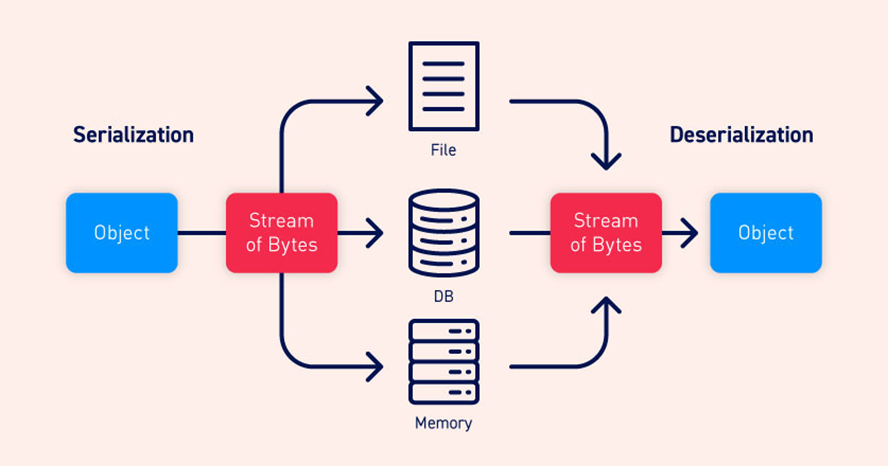

In [6]:
# Збереження налаштувань
settings = {'theme': 'dark', 'language': 'ukrainian'}
with open('settings.pickle', 'wb') as f:
    pickle.dump(settings, f)

# Завантаження налаштувань
with open('settings.pickle', 'rb') as f:
    loaded_settings = pickle.load(f)


## JSON

`JavaScript Object Notation`, є текстовим форматом для представлення структурованих даних на основі синтаксису об'єктів мови програмування JavaScript.

- зберігання конфігурацій, 
- серіалізації даних в файлових системах та як формат обміну даними між різними мовами програмування, завдяки його простоті та підтримці багатьма бібліотеками.
- Він представляє дані як набір ключ-значення, 
     - де ключі є рядками, 
     - а значення можуть бути рядками, числами, масивами, логічними значеннями або навіть іншими об'єктами. 
     Це дозволяє легко представляти складні структури даних, такі як списки, словники та ієрархічні дерева.


Синтаксис JSON базується на двох структурних елементах: 
- об'єкти
- масиви.

У `JSON`, **об'єкти** представляються у вигляді пар **"ключ-значення"** і огортаються у фігурні дужки `{}`. 
- Ключі мають бути рядками (текстом у подвійних лапках), 
- а значення можуть бути рядками, числами, масивами, логічними значеннями, іншими об'єктами або навіть значенням `null` (це значення None для Python). 
- Кожна пара "ключ-значення" відділяється комою.

**Масиви** в `JSON` представляються **послідовністю значень**, огорнутих у квадратні дужки `[]`. 
- Значення в масиві теж можуть бути рядками, числами, об'єктами, іншими масивами, логічними значеннями або null, 
- і вони відділяються одне від одного комами.




In [ ]:
# object
{
  "name": "Gupalo Vasyl",
  "age": 30,
  "isStudent": true
}


In [ ]:
# array
["apple", "banana", "cherry"]


**Серіалізація** (або "запис") перетворює об'єкти Python у рядок у форматі `JSON`. 
`json.dumps()` для перетворення об'єктів у рядок `JSON`.

- Метод `dumps` запаковує в byte-рядок об'єкт, 
- `loads` розпаковує (десеріалізує) з byte-рядка в об'єкт. 

Ці методи потрібні, коли ми хочемо контролювати, що робити з byte представленням, наприклад, відправити його мережею або прийняти з мережі.

Можна побачити, що `unpacked_some_data` **не дорівнює** `some_data`, і ми не отримали той самий об'єкт. 

Хоча JSON і Python мають схожу структуру даних, є деякі відмінності. 
- JSON **не розрізняє кортежі та списки**, обидва типи в Python будуть конвертовані у **масиви** `JSON`. 
- Окрім того **ключ ціле число 2** був неявно перетворений на рядок `'2'`.


бібліотека json дозволяє використовувати додаткові параметри `default` та `object_hook` для нестандартної серіалізації та десеріалізації. 


In [7]:
import json

some_data = {
    "key": "value",
    2: [1, 2, 3],
    "my_tuple": (5, 6),
    "my_dict": {"key": "value"},
}

json_string = json.dumps(some_data)
print(json_string)
unpacked_some_data = json.loads(json_string)
print(unpacked_some_data)


{"key": "value", "2": [1, 2, 3], "my_tuple": [5, 6], "my_dict": {"key": "value"}}
{'key': 'value', '2': [1, 2, 3], 'my_tuple': [5, 6], 'my_dict': {'key': 'value'}}


#### serialization using the json.JSONEncoder

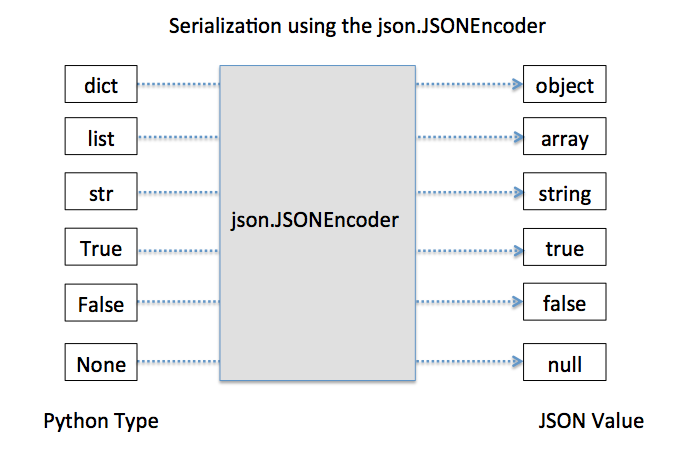

- Модуль json перетворює `dict` в `об’єкти JSON`,
- `Список і кортеж` перетворюються в `масив JSON`.
- `Рядок` Python перетворюється на `рядок JSON`.
- `Цілі числа та дійсні числа` перетворюються на `числа JSON`.
- Логічне значення `True` перетворюється на `константу JSON true`.
- Логічне значення `False` перетворюється на `константу JSON false`.
- `None` перетворюється на константу `JSON null`.

Серіалізація об'єкта Python у рядок формату `JSON` виконується за допомогою методу `json.dump()`, якщо потрібно записати JSON безпосередньо у файл.

In [1]:
import json

# Python об'єкт (словник)
data = {"name": "Gupalo Vasyl", "age": 30, "isStudent": True}

# Серіалізація у файл
with open("data.json", "w", encoding="utf-8") as f:
    json.dump(data, f)


Десеріалізація перетворює рядок у форматі `JSON` назад у відповідні об'єкти Python. Це виконується за допомогою методу `json.load()`, якщо JSON читається безпосередньо з файлу.

In [3]:
import json

# Десеріалізація з файлу
with open("data.json", "r", encoding="utf-8") as f:
    # data_from_file = json.load(f)
    # print(data_from_file)
    print(json.load(f))


{'name': 'Gupalo Vasyl', 'age': 30, 'isStudent': True}


Проблема може виникнути тільки при записі у файл `JSON` **кирилиці або будь-яких інших не ASCII символів**. 

Тому важливо забезпечити правильне кодування символів, щоб уникнути проблем з читанням файлу та його сумісністю. 
Python за замовчуванням використовує кодування `UTF-8`, яке підтримує кирилицю, **але при записі в JSON нам необхідно вказати додаткові параметри для забезпечення коректного відображення символів**. 

По що мова? Глянемо наступний приклад.


In [4]:
import json

# Python об'єкт (словник)
data = {"name": "Гупало Василь", "age": 30, "isStudent": True}

# Серіалізація у файл
with open("data.json", "w", encoding="utf-8") as f:
    json.dump(data, f)


Ось як можна це виправити та записати дані в файл JSON, використовуючи кирилицю:

In [7]:
import json

# Python об'єкт (словник)
data = {"name": "Гупало Василь", "age": 30, "isStudent": True}

# Серіалізація у файл
with open("data.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=4)


Ми використали два важливих параметри `json.dump` функції:

- `ensure_ascii=False` гарантує, що **символи кирилиці будуть записані як є, без перетворення в їхні Unicode escape-послідовності**.
- `indent=4` забезпечує форматування виведення, роблячи `JSON` файл легшим для читання людиною за допомогою відступів.

## Робота з таблицями CSV у Python

`CSV (Comma-Separated Values)` — формат файлу, що використовується для зберігання табличних даних. 



Його назва походить від основної ідеї - використання коми для відділення значень в середині рядка. 

Однак на практиці як роздільник можуть використовуватися й інші символи, наприклад крапка з комою ; або знак табуляції. 

CSV файл легко читається та створюється як людьми, так і програмами, що робить його популярним вибором для обміну даними.

- Файл CSV складається з рядків, і кожен рядок представляє один запис. 
- Записи поділяються на поля, які розділені зазвичай комами. 
- Перший рядок у файлі часто використовується для заголовків, що описують зміст кожного поля у записах.

Припустімо, що у нас є таблиця з даними про студентів, яка містить ім'я, вік та спеціальність. У форматі CSV ця таблиця може виглядати наступним чином:

```
name,age,specialty
Василь Гупало,30,Математика
Марія Петренко,22,Фізика
Олександр Коваленко,20,Інформатика
```

Для читання даних з CSV файлу можна використовувати функцію `csv.reader`, що **повертає об'єкт, який ітерує по рядках файлу**.

- При відкритті файлу ми використали параметр `newline=''` для **правильної обробки рядків незалежно від операційної системи**. 
- Параметр `encoding='utf-8'` гарантує **коректне читання файлу з кирилицею**.

#### `newline=''`. 
Різні операційні системи використовують різні символи для позначення кінця рядка в текстових файлах: 
- Windows використовує повернення каретки та переведення рядка `\r\n`, 
- Linux та MacOS використовує лише переведення рядка` \n`, 
- старі версії MacOS, до версії 10 взагалі використовували повернення каретки `\r`.

- Коли ми відкриваємо файл для читання чи запису, параметр `newline=''` інструктує Python **не проводити жодної спеціальної обробки символів кінця рядка**. 
- Наш CSV файл може бути створений або використаний у різних операційних системах і неправильна обробка кінців рядків може призвести до з'єднання рядків або невірного їх розділення, що порушить структуру даних у файлі. 
- Тому використання `newline=''` забезпечує, що модуль csv коректно інтерпретує кінці рядків незалежно від операційної системи, в якій виконується код.

In [8]:
import csv

# Відкриваємо CSV файл
with open("data.csv", newline="", encoding="utf-8") as csvfile:
    # Створюємо об'єкт reader
    reader = csv.reader(csvfile, delimiter=",")
    # Проходимося по кожному рядку у файлі
    for row in reader:
        print(", ".join(row))


name, age, specialty
Василь Гупало, 30, Математика
Марія Петренко, 22, Фізика
Олександр Коваленко, 20, Інформатика


Для запису даних у CSV файл можна використати функцію `csv.writer`. Вона дозволяє легко записувати рядки даних у файл.

In [9]:
import csv

# Дані для запису
rows = [
    ["name", "age", "specialty"],
    ["Василь Гупало", 30, "Математика"],
    ["Марія Петренко", 22, "Фізика"],
    ["Олександр Коваленко", 20, "Інформатика"],
]

# Відкриваємо файл для запису
with open("data.csv", "w", newline="", encoding="utf-8") as csvfile:
    # Створюємо об'єкт writer
    writer = csv.writer(csvfile, delimiter=",")
    # Записуємо рядки даних
    writer.writerows(rows)


- За допомогою `writer.writerows(rows)` можна записати кілька рядків одразу. 
- Якщо потрібно записати один рядок, можна використати `writer.writerow(row)`.

- Модуль csv також надає класи `csv.DictReader` і `csv.DictWriter`, які дозволяють працювати з рядками як зі словниками. Це зручно, коли у файлі CSV є заголовки стовпців.

Інструкція `csv.DictWriter(csvfile, fieldnames=fieldnames)` створює об'єкт для запису,
-  де `fieldnames` є списком назв полів, який визначає порядок і заголовки колонок у CSV файлі. 
- `writer.writeheader()`записує рядок заголовків у файл. 
- `writer.writerow()` використовується для запису кожного рядка даних у файл. 
- Дані передаються у формі словника, де ключі відповідають назвам полів, визначеним у fieldnames.

При читанні файлу CSV `csv.DictReader(csvfile)` створює об'єкт для ітерації по рядках файлу, 
- де кожен рядок представлений як словник. 
- Ключі у цих словниках відповідають заголовкам у першому рядку CSV файлу.
- У циклі for `row in reader`: кожен `row` є **словником**, де можна доступитися до значень полів за їхніми іменами.


In [10]:
import csv

# Запис у CSV файл зі словників
with open("students.csv", "w", newline="", encoding="utf-8") as csvfile:
    fieldnames = ["name", "age", "specialty"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({"name": "Олег Олегов", "age": 23, "specialty": "Історія"})
    writer.writerow({"name": "Анна Сергіївна", "age": 22, "specialty": "Біологія"})

# Читання з CSV файлу в словники
with open("students.csv", newline="", encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row["name"], row["age"], row["specialty"])


Олег Олегов 23 Історія
Анна Сергіївна 22 Біологія


Зверніть увагу, що тут ми імена колонок визначили через ключі першого словника у списку users: `columns = users[0].keys()`.

In [11]:
import csv

FILENAME = "users.csv"

users = [
    {"name": "Микола", "age": 22, "gender": "male"},
    {"name": "Марія", "age": 22, "gender": "female"},
    {"name": "Назар", "age": 22, "gender": "male"},
]

with open(FILENAME, "w", encoding="utf-8", newline="") as f:
    columns = users[0].keys()
    writer = csv.DictWriter(f, delimiter=",", fieldnames=columns)
    writer.writeheader()
    for row in users:
        writer.writerow(row)

with open(FILENAME, "r", encoding="utf-8", newline="") as f:
    reader = csv.DictReader(f)

    for row in reader:
        print(row)


{'name': 'Микола', 'age': '22', 'gender': 'male'}
{'name': 'Марія', 'age': '22', 'gender': 'female'}
{'name': 'Назар', 'age': '22', 'gender': 'male'}


# Управління порядком серіалізації та копіювання об'єктів

## Управління порядком серіалізації


**не всі об'єкти Python можна серіалізувати**. 
- Наприклад, не можна серіалізувати **файловий дескриптор або системний ресурс**. 
- Тоді, що робити, коли є клас, об'єкт який треба запакувати, використовуючи pickle, але у нього є атрибути, що не серіалізуються? У такій ситуації можна скористатися магічними методами, які управляють серіалізацією та десеріалізацією за допомогою pickle.

Методи `__getstate__` і `__setstate__` в Python дозволяють нам контролювати, як об'єкт повинен бути серіалізований та десеріалізований модулем pickle.

- Коли викликається `pickle.dump()` або `pickle.dumps()` для серіалізації об'єкта, Python шукає метод `__getstate__` у класі об'єкта. 
     - Якщо метод існує, він використовується для отримання стану об'єкта для серіалізації. 
- При десеріалізації, за допомогою `pickle.load()` або `pickle.loads()`, Python шукає метод `__setstate__` у класі. 
     - Якщо метод існує, він використовується для відновлення стану об'єкта з даних, отриманих під час десеріалізації.

Припустимо, у нас є клас `Robot`, який містить інформацію про робота, але ми хочемо серіалізувати лише певні атрибути.


Для цих операцій ми використовуємо `self.__dict__`, який є спеціальним атрибутом об'єкта, що містить словник з усіма атрибутами, які належать до цього об'єкта. 

Ключі у цьому словнику відповідають іменам атрибутів, а значення — це відповідні значення цих атрибутів. 

Коли ми створюємо новий екземпляр класу, Python автоматично створює словник `__dict__` для цього екземпляра, щоб зберігати всі атрибути, які додаються до цього об'єкта.


In [12]:
import pickle

class Robot:
    def __init__(self, name, battery_life):
        self.name = name
        self.battery_life = battery_life
        # Цей атрибут ми не збираємось серіалізувати
        self.is_active = False  

    def __getstate__(self):
        state = self.__dict__
        # Видаляємо is_active з серіалізованого стану
        del state['is_active']
        return state

    def __setstate__(self, state):
        # Відновлюємо об'єкт при десеріалізації
        self.__dict__.update(state)
        # Задаємо значення is_active за замовчуванням
        self.is_active = False  

# Створення об'єкта Robot
robot = Robot("Robo1", 100)

# Серіалізація об'єкта
serialized_robot = pickle.dumps(robot)

# Десеріалізація об'єкта
deserialized_robot = pickle.loads(serialized_robot)

print(deserialized_robot.__dict__)


{'name': 'Robo1', 'battery_life': 100, 'is_active': False}


Пояснимо на простому прикладі, маємо простий клас:

```
class Example:
    def __init__(self, name, age):
        self.name = name
        self.age = age
```


Коли ми створюємо екземпляр цього класу:

`obj = Example("Gupalo Vasyl", 30)`


То `obj.__dict__` міститиме:

`{'name': 'Gupalo Vasyl', 'age': 30}`


Ми можемо динамічно додавати, видаляти або змінювати атрибути:

`obj.__dict__['city'] = 'Poltava'`  # Додавання нового атрибута
`print(obj.city)`  # Виведення: Poltava

`del obj.__dict__['age']`  # Видалення атрибута age
`print(obj.__dict__)`  # Виведення: {'name': 'Gupalo Vasyl', 'city': 'Poltava'}


Однак, це слід робити дуже обережно, оскільки необдумані зміни можуть призвести до непередбачуваної поведінки об'єкта.
- У нашому прикладі, ми використовуємо `self.__dict__` для копіювання всіх атрибутів об'єкта `Robot` при реалізації методів __getstate__ і `__setstate__`, що дозволяє зберігати і відновлювати стан об'єкта при роботі з модулем pickle.

Більш практично ця техніка використовується для об'єктів, що містять несеріалізовані атрибути, такі як відкриті файли або з'єднання з базами даних. Розглянемо наступний приклад, який визначає клас `Reader` для читання даних з файлу. Клас простий, з методами для ініціалізації та закриття файлового дескриптора, а також методом для читання вмісту файлу.


In [ ]:
class Reader:
    def __init__(self, filename):
        self.filename = filename
        self.fh = open(self.filename, "r", encoding="utf-8")

    def close(self):
        self.fh.close()

    def read(self):
        data = self.fh.read()
        return data

if __name__ == "__main__":
    reader = Reader("data.txt")
    data = reader.read()
    print(data)
    reader.close()


Однак, є важлива особливість стосовно використання цього класу з бібліотеками серіалізації, такими як pickle. Якщо ми захочемо серіалізувати наш об'єкт reader то отримаємо помилку.

При намаганні серіалізувати екземпляр класу Reader за допомогою `pickle`, виникає помилка, оскільки файловий дескриптор `self.fh` не може бути серіалізованим. Вона виникає тому, що файлові дескриптори не підлягають серіалізації pickle через їх залежність від зовнішніх системних ресурсів, які pickle не може зберегти та відновити.

Для того, щоб зробити екземпляри класу `Reader` серіалізованими, нам необхідно реалізувати методи `__getstate__` та `__setstate__` та керувати поведінкою `pickle` для класу. Це дозволить нам явно визначити, яка частина об'єкта має бути серіалізована, та як об'єкт має бути відновлений.

У наступному прикладі клас Reader можна серіалізувати і помилки через неможливість упакувати файловий дескриптор вже не виникне.


- У цій модифікованій версії, метод `__getstate__` створює копію словника атрибутів об'єкта з `self.__dict__`, але замінює `fh` на `None`, щоб уникнути спроби серіалізації відкритого файлового дескриптора.

**☝ Файловий дескриптор `self.fh` не включений до стану, тому що він не може бути серіалізованим.**

- Метод `__setstate__` відновлює стан об'єкта зі стану, отриманого при десеріалізації, і відкриває файл знову, використовуючи збережене ім'я файлу. 

- Це дозволяє нам знову отримати доступ до вмісту файлу після десеріалізації.
- Загалом наша реалізація ефективно вирішує проблему з неможливістю серіалізації файлових дескрипторів і дозволяє безпечно зберігати та відновлювати стан об'єктів, що працюють з файлами.

In [ ]:
import pickle

class Reader:
    def __init__(self, filename):
        self.filename = filename
        self.fh = open(self.filename, "r", encoding="utf-8")

    def close(self):
        self.fh.close()

    def read(self):
        data = self.fh.read()
        return data

    def __getstate__(self):
        attributes = {**self.__dict__, "fh": None}
        return attributes

    def __setstate__(self, state):
        # Відновлюємо стан об'єкта
        self.__dict__ = state
        self.fh = open(state["filename"], "r", encoding="utf-8")

if __name__ == "__main__":
    reader = Reader("data.txt")
    data = reader.read()
    print(data)
    reader.close()

    # Приклад серіалізації об'єкта Reader
    with open("reader.pkl", "wb") as f:
        pickle.dump(reader, f)

    # Приклад десеріалізації об'єкта Reader
    with open("reader.pkl", "rb") as f:
        loaded_reader = pickle.load(f)
        print(loaded_reader.read())
        loaded_reader.close()


## Створення копій об'єктів в Python


Створення копій об'єктів у Python може виявитися нетривіальним завданням, залежно від того, чи потрібна вам поверхнева (`shallow`) або глибока (`deep`) копія, а також від складності структури даних об'єкта.

Python намагається заощаджувати пам'ять і не копіювати дані з однієї області пам'яті в іншу. Натомість інтерпретатор створює нове посилання, це ще один псевдонім, на реальний об'єкт, замість копіювання вмісту. Така поведінка може бути небажаною, розглянемо наприклад:

In [13]:
my_list = [1, 2, 3]
copy_list = my_list
copy_list.append(4)
print(my_list)


[1, 2, 3, 4]


Виходить, що `copy_list` — це просто ще одне ім'я для того самого списку `my_list` і, змінюючи `copy_list`, ми змінюємо й `my_list`. Це неочевидно і може збивати з пантелику.

Така поведінка може призводити до помилок, коли справа стосується типів, словників, списків, класів користувача, що змінюються.

Розглянемо приклад де ми передаємо список в середину функції, а вона його змінює:

In [14]:
my_list = [1, 2, 3]

def square_list(x: list):
    for i, el in enumerate(x):
        x[i] = el**2
    return x

new_list = square_list(my_list)
print(new_list)
print(my_list)


[1, 4, 9]
[1, 4, 9]


Як бачимо список `my_list` зазнав змін, і можливо це зовсім небажана поведінка. У прикладі функція `square_list` приймає список x як аргумент і модифікує його, підносячи кожен елемент до квадрату. Виходить, що функція змінює вхідний список без створення нового списку. Тому коли ми передали `my_list` в `square_list`, оригінальний список `my_list` змінюється.

Якщо нам потрібно зберегти оригінальний список `my_list` без змін і створити новий список з квадратами елементів, то слід створити копію списку перед його зміною або змінити функцію, щоб вона повертала новий список з квадратами елементів, замість зміни вхідного списку. Наприклад:


In [15]:
my_list = [1, 2, 3]

def square_list(x: list):
    return [el**2 for el in x]

new_list = square_list(my_list)
print(new_list)
print(my_list)


[1, 4, 9]
[1, 2, 3]


**Для списків та словників можна скористатися явним копіюванням:**


In [16]:
my_list = [1, 2, 3]
copy_list = my_list[:]
copy_list.append(4)
print(my_list, copy_list)

my_dict = {1: "a"}
copy_dict = {**my_dict}
copy_dict["new_key"] = "new_value"
print(my_dict, copy_dict)


[1, 2, 3] [1, 2, 3, 4]
{1: 'a'} {1: 'a', 'new_key': 'new_value'}


## Створення поверхневих копій об'єктів Python


Щоб створити "поверхневу" копію об'єкта, **у пакеті `copy` є функція `copy`**. 
Ця функція створює новий об'єкт такого самого типу і потім створює посилання на увесь вміст старого об'єкта в новий. 

Такий механізм досить хороший для роботи з об'єктами, де вже на першому рівні вкладеності немає змінних об'єктів, і він працює досить швидко

**Поверхнева копія означає, що** 
- новий список `copy_list` буде містити **нові посилання на ті ж самі об'єкти**, що і оригінальний список 
- і для об'єктів із глибокою вкладеністю така функція все ж таки не дасть потрібного ефекту. 
- Тому **вкладені об'єкти, такі як словник в третьому елементі списку**, будуть спільними між оригінальним та скопійованим списками.

In [17]:
import copy

my_list = [1, 2, {"name": "Gupalo Vasyl"}]
copy_list = copy.copy(my_list)
copy_list.append(4)
print(my_list)
print(copy_list)


[1, 2, {'name': 'Gupalo Vasyl'}]
[1, 2, {'name': 'Gupalo Vasyl'}, 4]


In [18]:
import copy

my_list = [1, 2, {"name": "Gupalo Vasyl"}]
copy_list = copy.copy(my_list)
copy_list[2]["age"] = 30
print(my_list)
print(copy_list)


[1, 2, {'name': 'Gupalo Vasyl', 'age': 30}]
[1, 2, {'name': 'Gupalo Vasyl', 'age': 30}]


З цього прикладу видно, що хоча copy_list вже є новим об'єктом, але вкладений у нього словник з індексом 2 — це один і той самий словник і в `copy_list`, і в `my_list`.

**Поверхнева копія створює новий об'єкт, але не копіює вкладені об'єкти. Замість цього, вона копіює лише посилання на вкладені об'єкти. Це означає, що якщо ви змінюєте вкладені об'єкти в оригіналі, ці зміни також відобразяться у поверхневій копії.**

## Створення глибоких копій об'єктів Python


Глибока копія **створює новий об'єкт** та **рекурсивно копіює всі вкладені об'єкти**. В результаті, ви отримуєте повністю незалежну копію оригінального об'єкта.

Для створення глибокої копії використовуйте метод `deepcopy()` модуля copy. **Ця функція рекурсивно створює нові об'єкти.**

In [19]:
import copy

my_list = [1, 2, {"name": "Gupalo Vasyl"}]
copy_list = copy.deepcopy(my_list)
copy_list[2]["age"] = 30
print(my_list)
print(copy_list)


[1, 2, {'name': 'Gupalo Vasyl'}]
[1, 2, {'name': 'Gupalo Vasyl', 'age': 30}]


## Управління порядком копіювання об'єктів Python


Ще одна проблема, яка вирішується за допомогою пакета `copy` — це **копіювання об'єктів користувача**.

Щоб створити об'єкт, який буде коректно оброблятися функціями `copy` та `deepcopy`, заданий клас повинен реалізувати два магічних методи: `__copy__` та `__deepcopy__` для поверхневого та глибокого копіювання відповідно.

Коли викликаємо `copy.copy()` або `copy.deepcopy()` на об'єкті, **Python автоматично шукає і викликає ці магічні методи в класі об'єкта, якщо вони визначені.**

- `__copy__` повинен повертати поверхневу копію об'єкта.
- `__deepcopy__` повинен повертати глибоку копію об'єкта. 
     - Він приймає додатковий аргумент `memo`, який є **словником**, що використовується для уникнення нескінченної рекурсії при копіюванні вкладених об'єктів, які посилаються самі на себе.

Спочатку розглянемо простий приклад класу, який реалізує обидва ці методи:
- У нашому прикладі, при виклику `copy.copy(obj)` буде створено **новий екземпляр** `MyClass` з тим же значенням `value`. 
- При виклику `copy.deepcopy(obj)` також буде створено **новий екземпляр**, але з використанням `copy.deepcopy` для значення `value`, що забезпечує глибоке копіювання будь-яких вкладених об'єктів.
-  `__deepcopy__` використовує словник `memo`. Словник `memo` використовується для відстеження об'єктів, які вже були скопійовані під час поточної операції глибокого копіювання.

- Коли `__deepcopy__` викликається для об'єкта, він **перевіряє, чи існує вже копія цього об'єкта в словнику `memo`**. 
      - Якщо **так**, метод повертає **посилання на вже скопійований об'єкт** замість створення нової копії. Це запобігає створенню кількох копій одного і того ж об'єкта під час глибокого копіювання та уникненню нескінченної рекурсії.

- У словнику `memo` **ключами** є ідентифікатори id об'єктів, а **значеннями** є вже скопійовані об'єкти. Це дозволяє швидко перевірити, чи був об'єкт уже оброблений під час поточної операції копіювання.

In [20]:
import copy

class MyClass:
    def __init__(self, value):
        self.value = value

    def __copy__(self):
        print("Викликано __copy__")
        return MyClass(self.value)

    def __deepcopy__(self, memo=None):
        print("Викликано __deepcopy__")
        return MyClass(copy.deepcopy(self.value, memo))

# Поверхневе копіювання
obj = MyClass(5)
obj_copy = copy.copy(obj)
obj_copy.value = 10

# Глибоке копіювання
obj_deepcopy = copy.deepcopy(obj)
obj_deepcopy.value = 20
print(obj.value, obj_copy.value, obj_deepcopy.value)


Викликано __copy__
Викликано __deepcopy__
5 10 20


- У цьому прикладі, `ComplexObject` містить вкладений об'єкт класу `SimpleObject`. 
- При поверхневому копіюванні `__copy__`, вкладений об'єкт self.`nested_obj` не копіюється глибоко, тому коли ми вносимо зміни в оригінальному об'єкті `nested_obj` вони вплинуть і на копію, що ми і бачимо в виведенні. 
- При глибокому копіюванні `__deepcopy__`, вкладений об'єкт self.`nested_obj` також копіюється глибоко, завдяки чому копія є повністю незалежною від оригіналу.

In [21]:
import copy

class SimpleObject:
    def __init__(self, greeting: str):
        self.greeting = greeting

class ComplexObject:
    def __init__(self, value: int, nested_obj: SimpleObject):
        self.value = value
        self.nested_obj = nested_obj

    def __copy__(self):
        print("Викликано __copy__ для ComplexObject")
        # Поверхневе копіювання не копіює вкладені об'єкти глибоко
        return ComplexObject(self.value, self.nested_obj)

    def __deepcopy__(self, memo=None):
        print("Викликано __deepcopy__ для ComplexObject")
        # Глибоке копіювання копіює вкладені об'єкти
        return ComplexObject(
            copy.deepcopy(self.value, memo), copy.deepcopy(self.nested_obj, memo)
        )

nested_obj = SimpleObject("Привіт")
complex_obj = ComplexObject(5, nested_obj)

# Створюємо копію та глибоку копію
complex_obj_copy = copy.copy(complex_obj)
complex_obj_deepcopy = copy.deepcopy(complex_obj)

# Змінюємо значення вкладеного об'єкту nested_obj
nested_obj.greeting = "Hello"

# Дивимось зміни у об'єктах
print(f"Copy object: {complex_obj_copy.nested_obj.greeting}")
print(f"Deepcopy object: {complex_obj_deepcopy.nested_obj.greeting}")


Викликано __copy__ для ComplexObject
Викликано __deepcopy__ для ComplexObject
Copy object: Hello
Deepcopy object: Привіт


Насправді, навіть без реалізації цих магічних методів все працюватиме як треба.


In [22]:
import copy

class SimpleObject:
    def __init__(self, greeting: str):
        self.greeting = greeting

class ComplexObject:
    def __init__(self, value, nested_obj: SimpleObject):
        self.value = value
        self.nested_obj = nested_obj

nested_obj = SimpleObject("Привіт")
complex_obj = ComplexObject(5, nested_obj)

# Створюємо копію та глибоку копію
complex_obj_copy = copy.copy(complex_obj)
complex_obj_deepcopy = copy.deepcopy(complex_obj)

# Змінюємо значення вкладеного об'єкту nested_obj
nested_obj.greeting = "Hello"

# Дивимось зміни у об'єктах
print(f"Copy object: {complex_obj_copy.nested_obj.greeting}")
print(f"Deepcopy object: {complex_obj_deepcopy.nested_obj.greeting}")


Copy object: Hello
Deepcopy object: Привіт


Мета було пояснити, як у Python можна налаштувати процеси поверхневого та глибокого копіювання об'єктів за допомогою реалізації спеціальних методів `__copy__` та `__deepcopy__`. 
- Це дозволяє контролювати, як саме об'єкти клонуються, коли використовуються функції `copy()` та `deepcopy()` з модуля `copy` та важливо для класів, які містять складні вкладені структури або залежності.

Наприклад, якщо наш об'єкт містить великі дані і вони не повинні бути дубльовані при копіюванні, то налаштування `__deepcopy__` дозволяє нам контролювати процес клонування. Це допомагає уникнути небажаного дублювання та забезпечує коректне копіювання складних структур.

Уявімо, що ми працюємо з класом, який представляє налаштування користувача, і ці налаштування включають в себе великий набір даних (гігабайти даних), який не потрібно дублювати при кожному копіюванні, але з яким потрібно працювати в ізольованому середовищі.
- Ми можемо налаштувати метод `__deepcopy__` таким чином, що він дозволяє ефективно копіювати налаштування користувача, не створюючи непотрібні копії великих об'єктів даних, до яких має бути лише посилання. 
- Бо якщо ми тільки читаємо дані об'єкту `self.large_data_reference` то взагалі немає необхідності дублювання цих даних при глибокому копіюванні. 
- Такий підхід дозволяє оптимізувати використання пам'яті та час виконання програми, зберігаючи при цьому необхідну гнучкість у роботі з копіями об'єктів.

In [23]:
import copy

class UserSettings:
    def __init__(self, preferences, large_data_reference):
        self.preferences = preferences
        self.large_data_reference = large_data_reference

    def __deepcopy__(self, memo):
        print("Кастомізоване глибоке копіювання для UserSettings")
        # Припустимо, що preferences - це невеликий словник, який можна безпечно скопіювати,
        # а large_data_reference - це посилання на великий об'єкт даних, яке ми не хочемо дублювати.
        new_preferences = copy.deepcopy(self.preferences, memo)
        # Передаємо посилання на ті ж великі дані замість їх копіювання
        new_obj = UserSettings(new_preferences, self.large_data_reference)
        return new_obj

# Створення екземпляра UserSettings
original_settings = UserSettings({"language": "uk"}, large_data_reference="LargeDataID")

# Глибоке копіювання з кастомізованою логікою
settings_copy = copy.deepcopy(original_settings)


Кастомізоване глибоке копіювання для UserSettings
